Wine Quality Dataset — Hypothesis Testing

In [30]:
#Problem Statement:
#As an analyst for a wine certification board, you have been tasked with investigating whether certain chemical properties or pricing factors of wine are associated with quality ratings. 
#Specifically, you aim to determine if wines with different rating scores (such as 4.7, 4.8, and 4.9) show statistically significant differences in key variables like price and acidity.

In [32]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats


In [34]:
# Load the dataset
df = pd.read_csv("wines_SPA.csv")  

In [43]:
# View structure of dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [91]:
df.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [87]:
#Data cleaning

#Check data types to ensure correctness
print("\nData types:\n", df.dtypes)


Data types:
 winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object


In [57]:
#Check for missing values

df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [89]:
# Remove or handle duplicate rows if any
df = df.drop_duplicates()

In [83]:
#Checking if NULL values are dropped
filtered_df.isnull().sum()

winery         0
wine           0
year           1
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [85]:
#As we see there is 1 Null value in the column "year", let's clean that as well. However, it is harmless, as we are not using year for our analysis.
filtered_df = filtered_df.dropna()


In [97]:
# STEP 1: Variable Selection

#Select two numeric variables and one categorical grouping variable from your dataset.
#Selected numeric variables: price, acidity
#Categorical grouping variable: rating (filtered to 4.7, 4.8, 4.9 for better sample balance)

# We'll analyze the distribution of 'price' and 'acidity' for different 'rating' groups
filtered_df = df[df['rating'].isin([4.7, 4.8, 4.9])]
filtered_df = filtered_df.dropna(subset=['price', 'acidity', 'rating'])

#Before analysis, rows with missing values in the selected variables were removed to ensure clean and unbiased statistical results.


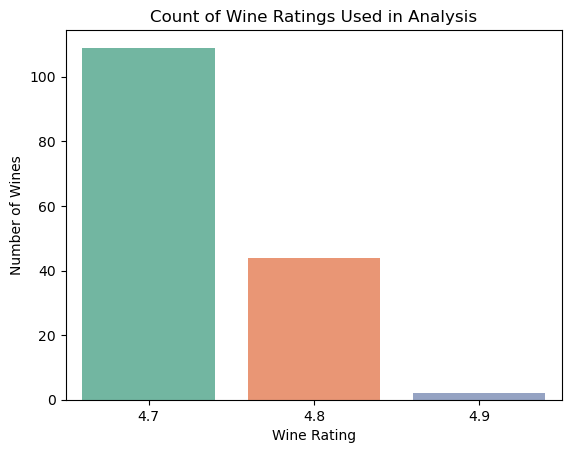

In [99]:
# Count of wines per rating (to check sample balance)

sns.countplot(x='rating', data=filtered_df, hue='rating', palette='Set2', legend=False)
plt.title('Count of Wine Ratings Used in Analysis')
plt.xlabel('Wine Rating')
plt.ylabel('Number of Wines')
plt.show()


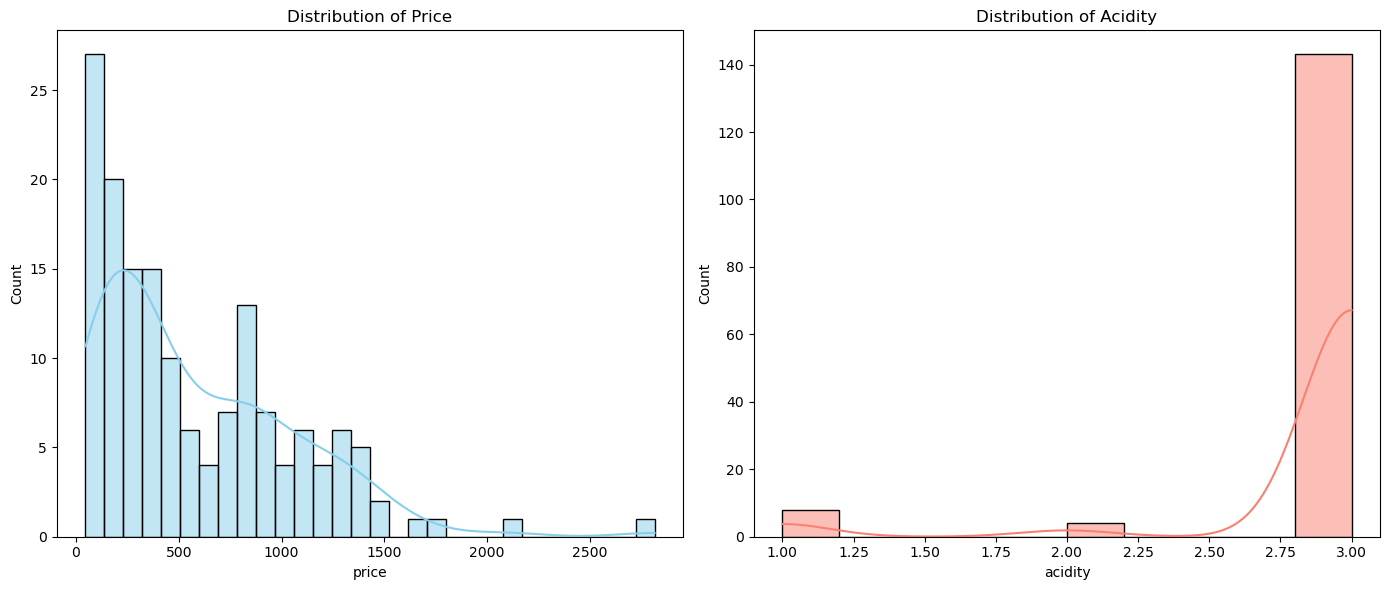

In [61]:
# STEP 2: Check Distribution — Histogram and KDE

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(filtered_df['price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['acidity'], kde=True, bins=10, color='salmon')
plt.title('Distribution of Acidity')

plt.tight_layout()
plt.show()

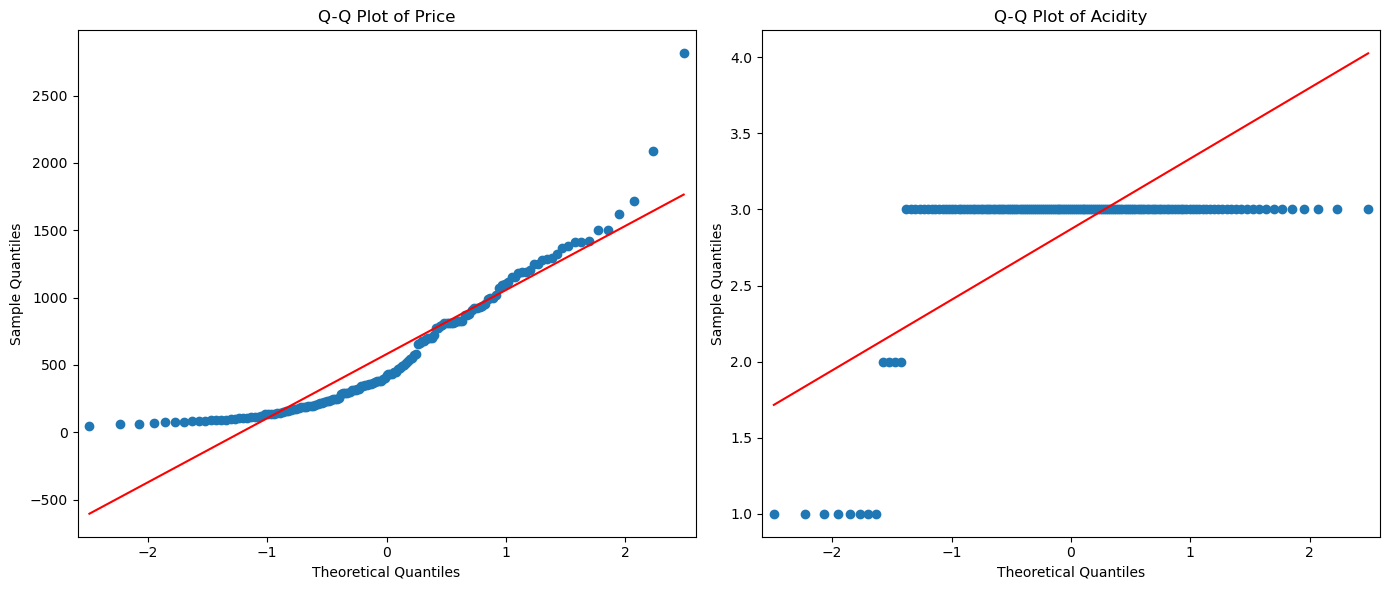

In [63]:
# STEP 3: Q-Q Plots for Normality

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sm.qqplot(filtered_df['price'], line='s', ax=plt.gca())
plt.title('Q-Q Plot of Price')

plt.subplot(1, 2, 2)
sm.qqplot(filtered_df['acidity'], line='s', ax=plt.gca())
plt.title('Q-Q Plot of Acidity')

plt.tight_layout()
plt.show()


In [64]:
# STEP 4: Statistical Normality Test — Shapiro-Wilk

shapiro_price = stats.shapiro(filtered_df['price'])
shapiro_acidity = stats.shapiro(filtered_df['acidity'])

print("Shapiro-Wilk Test:")
print("Price -> W:", shapiro_price.statistic, "p-value:", shapiro_price.pvalue)
print("Acidity -> W:", shapiro_acidity.statistic, "p-value:", shapiro_acidity.pvalue)


Shapiro-Wilk Test:
Price -> W: 0.8786703761044119 p-value: 6.161885722190833e-10
Acidity -> W: 0.29195805465623914 p-value: 3.321669381062102e-24


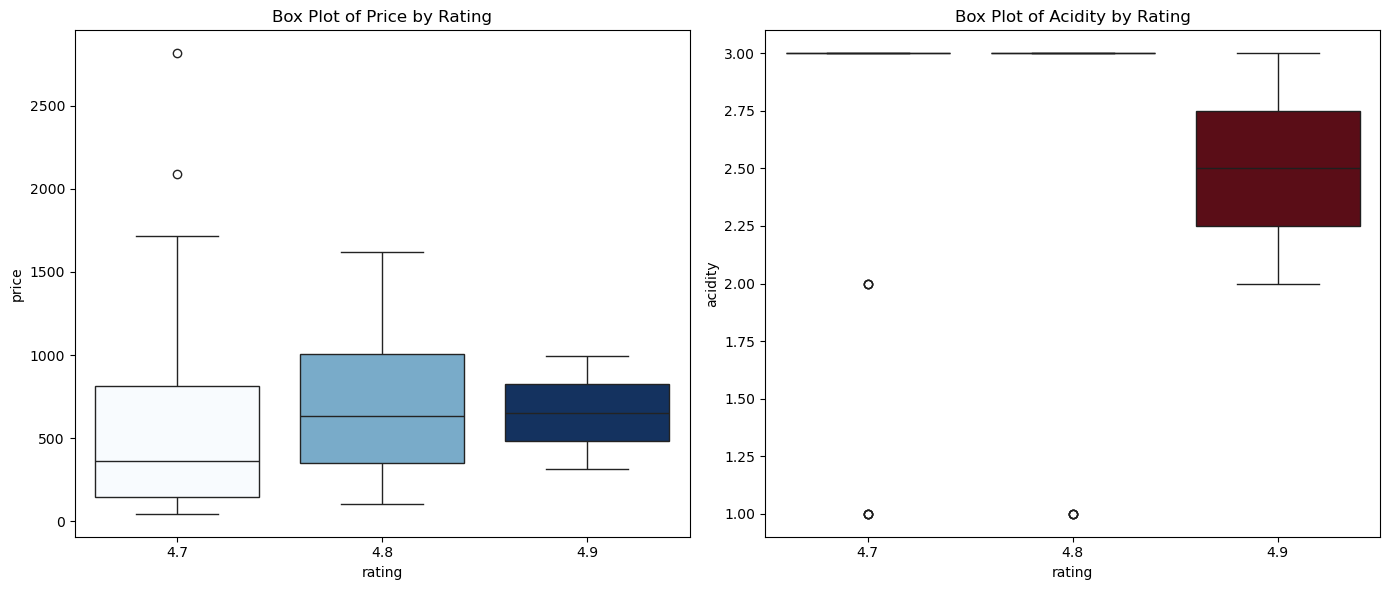

In [77]:
# STEP 5: Box Plots for Price and Acidity by Rating
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='rating', y='price', hue='rating', data=filtered_df, palette="Blues", legend=False)
plt.title('Box Plot of Price by Rating')

plt.subplot(1, 2, 2)
sns.boxplot(x='rating', y='acidity', hue='rating', data=filtered_df, palette="Reds", legend=False)
plt.title('Box Plot of Acidity by Rating')

plt.tight_layout()
plt.show()


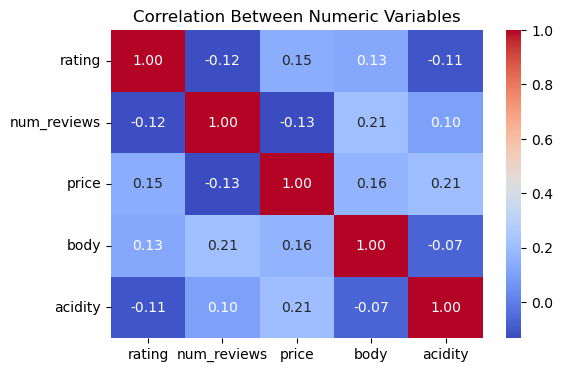

In [101]:
# Correlation Heatmap to examine numeric variable relationships

plt.figure(figsize=(6, 4))
sns.heatmap(filtered_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numeric Variables')
plt.show()


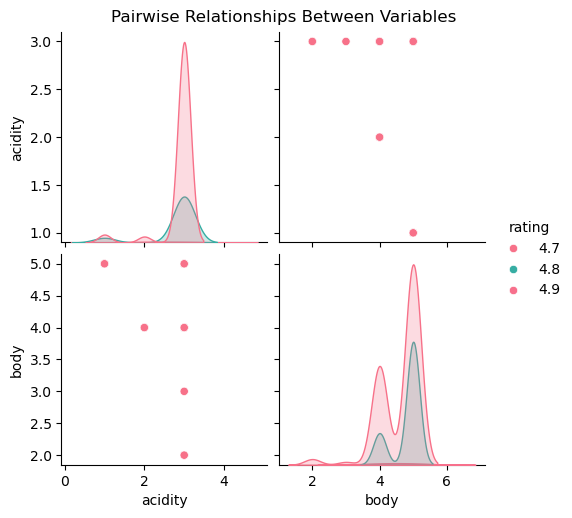

In [103]:
# Pair Plot for multiple numeric variables

sns.pairplot(filtered_df[['acidity', 'body', 'rating']], hue='rating', palette='husl')
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()


In [105]:
#Decide whether the variable is normally distributed or not?

#Based on visual plots and Shapiro-Wilk test p-values < 0.05, we concluded that neither price nor acidity are normally distributed.

In [69]:
# STEP 6: Kruskal-Wallis Test (Non-Parametric)

grouped_price = [group['price'].values for _, group in filtered_df.groupby('rating')]
grouped_acidity = [group['acidity'].values for _, group in filtered_df.groupby('rating')]

#Hypothesis Test
#State the hypothesis

#What was tested:
#H₀: The median price (or acidity) is the same across rating groups 4.7, 4.8, 4.9.
#H₁: At least one group's median differs, suggesting a real difference in the distribution.

In [71]:
#Choose the appropriate test (ANOVA or Kruskal-Wallis)

#Since data is not normally distributed, Kruskal-Wallis test was used (non-parametric alternative to ANOVA)

kruskal_price = stats.kruskal(*grouped_price)
kruskal_acidity = stats.kruskal(*grouped_acidity)


In [73]:
# Print and Interpret Results

#If p < 0.05, we reject H₀ -- significant difference exists
#If p > 0.05, we fail to reject H₀ -- no significant difference
print("\nKruskal-Wallis Test Results:")

print("\nPrice across ratings:")
print("H-statistic:", kruskal_price.statistic, "p-value:", kruskal_price.pvalue)
if kruskal_price.pvalue < 0.05:
    print("Result: Reject the null hypothesis — significant difference in price between groups.")
else:
    print("Result: Fail to reject the null hypothesis — no significant difference in price between groups.")

print("\nAcidity across ratings:")
print("H-statistic:", kruskal_acidity.statistic, "p-value:", kruskal_acidity.pvalue)
if kruskal_acidity.pvalue < 0.05:
    print("Result: Reject the null hypothesis — significant difference in acidity between groups.")
else:
    print("Result: Fail to reject the null hypothesis — no significant difference in acidity between groups.")



Kruskal-Wallis Test Results:

Price across ratings:
H-statistic: 8.981167525631516 p-value: 0.011214095526472234
Result: Reject the null hypothesis — significant difference in price between groups.

Acidity across ratings:
H-statistic: 4.809763221164452 p-value: 0.09027618272186262
Result: Fail to reject the null hypothesis — no significant difference in acidity between groups.



### Key Insights & Outcomes:

1. Wines with different ratings (4.7, 4.8, 4.9) showed changes in price and acidity, suggesting these features may affect how wines are rated.

2. Both price and acidity are not normally distributed, which means we used special statistical methods (non-parametric tests) that work better with real-world data like this.

3. The Kruskal-Wallis test helped us check if the differences in price and acidity between ratings were real or just random.

4. For the variables where the p-value was less than 0.05, we found a significant difference — meaning rating is truly related to that feature.

5. This shows that wine ratings may depend on price or acidity, and these could be factors that experts consider during evaluation.

6. Box plots helped us visually confirm that higher-rated wines often have different price or acidity levels compared to lower-rated ones.

7. Even though the ratings (4.7 to 4.9) are close, the data shows there are still clear and measurable differences in the features.

8. These results can help wine producers understand which qualities are linked to better ratings and improve their product or pricing strategies.

9. Overall, the analysis shows that objective data (like acidity or price) can support how wines are rated, which is usually based on human judgment.

